# MSA 2024 Phase 2 - Part 1

In [1]:
!pip install pandas seaborn matplotlib


  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.1.tar.gz (36.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-2.0.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata (5.8

In [5]:
!pip install scikit-learn


  Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp39-cp39-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## 1. Find all variables and understand them

Features DataFrame:
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   
5      1 2010-03-12        57.79       2.667        NaN        NaN        NaN   
6      1 2010-03-19        54.58       2.720        NaN        NaN        NaN   
7      1 2010-03-26        51.45       2.732        NaN        NaN        NaN   
8      1 2010-04-02        62.27       2.719        NaN        NaN        NaN   
9      1 2010-04-09        65.86       2.770        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  

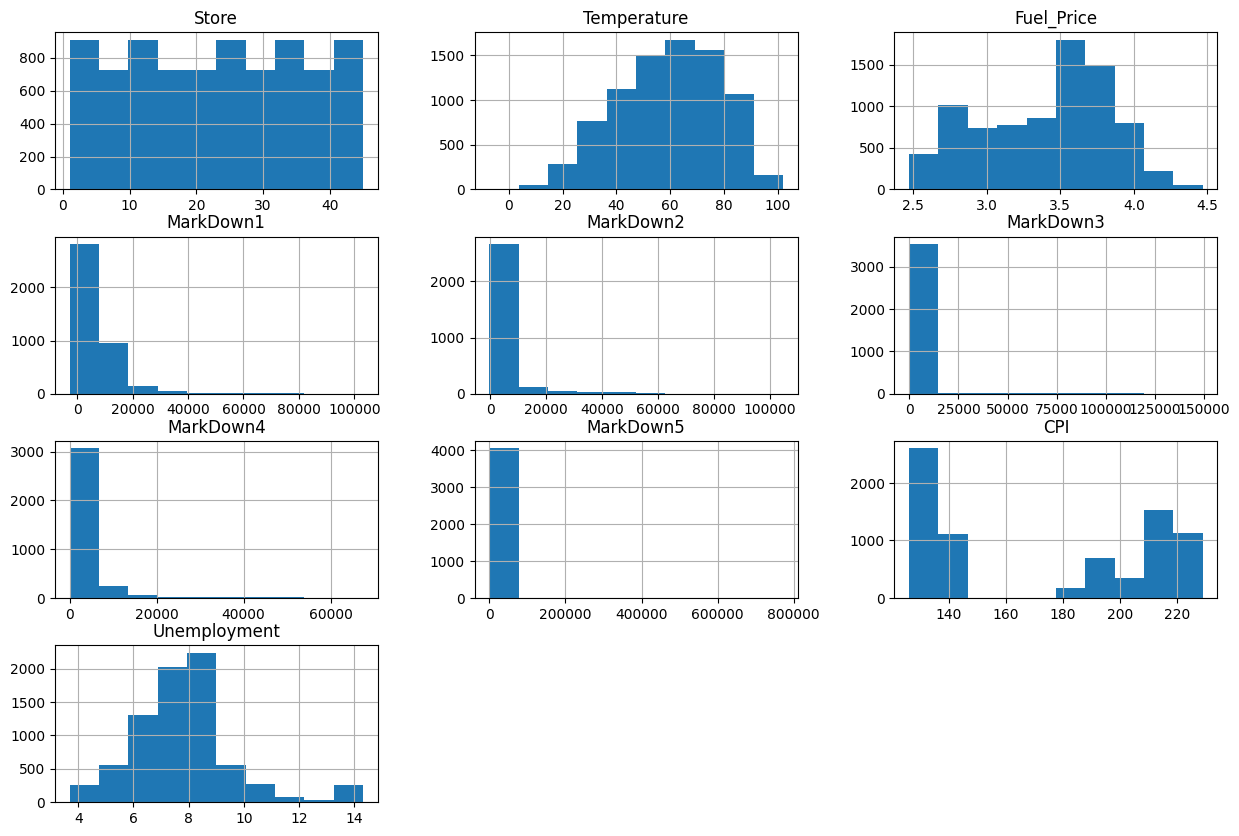

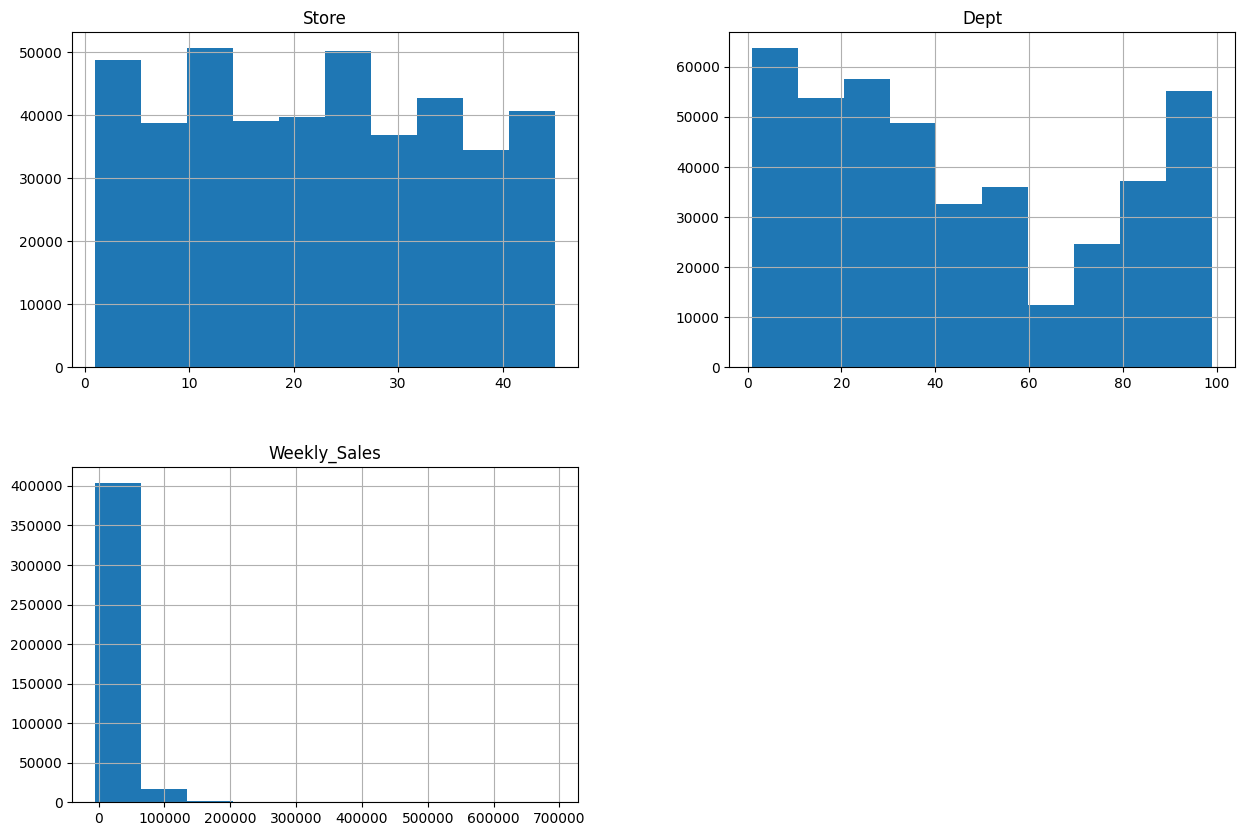

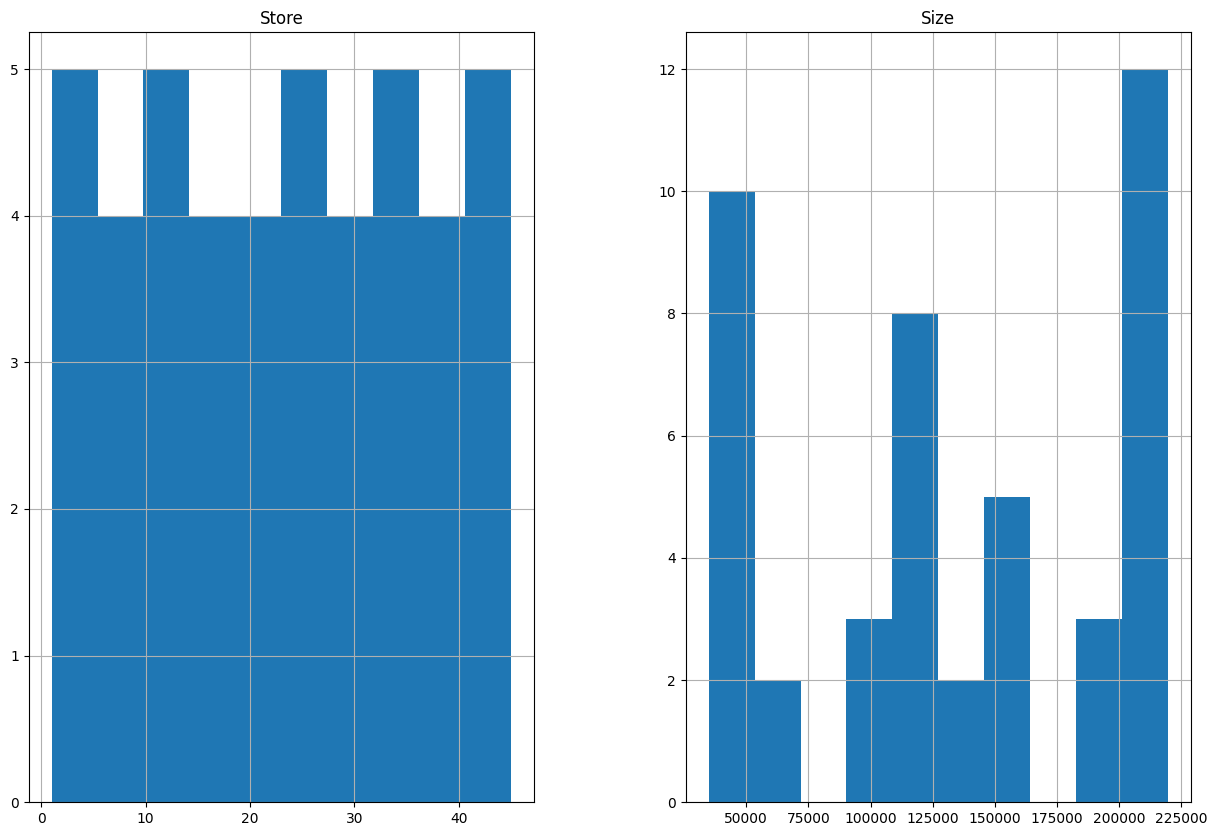

In [7]:
## Load the datasets
features_df = pd.read_csv('features.csv')
sales_df = pd.read_csv('sales.csv')
stores_df = pd.read_csv('stores.csv')

# Convert 'Date' columns to datetime format
features_df['Date'] = pd.to_datetime(features_df['Date'])
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Display the first ten instances of each dataset
print("Features DataFrame:")
print(features_df.head(10))
print("\nSales DataFrame:")
print(sales_df.head(10))
print("\nStores DataFrame:")
print(stores_df.head(10))

# Key statistical measures for features dataset
print("Features DataFrame - Statistical Measures:")
print(features_df.describe())

# Key statistical measures for sales dataset
print("\nSales DataFrame - Statistical Measures:")
print(sales_df.describe())

# Key statistical measures for stores dataset
print("\nStores DataFrame - Statistical Measures:")
print(stores_df.describe())
# Visualization of numerical columns in the features dataset
numeric_features = features_df.select_dtypes(include=['float64', 'int64'])
numeric_features.hist(figsize=(15, 10))
plt.show()

# Visualization of numerical columns in the sales dataset
numeric_sales = sales_df.select_dtypes(include=['float64', 'int64'])
numeric_sales.hist(figsize=(15, 10))
plt.show()

# Visualization of numerical columns in the stores dataset
numeric_stores = stores_df.select_dtypes(include=['float64', 'int64'])
numeric_stores.hist(figsize=(15, 10))
plt.show()

## 2. Clean data

In [8]:
## Handle missing values
features_df = features_df.dropna()
sales_df = sales_df.dropna()
stores_df = stores_df.dropna()

# Remove outliers function
def remove_outliers(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

# Remove outliers from the datasets
features_df = remove_outliers(features_df)
sales_df = remove_outliers(sales_df)
stores_df = remove_outliers(stores_df)

## 3. Visualise data

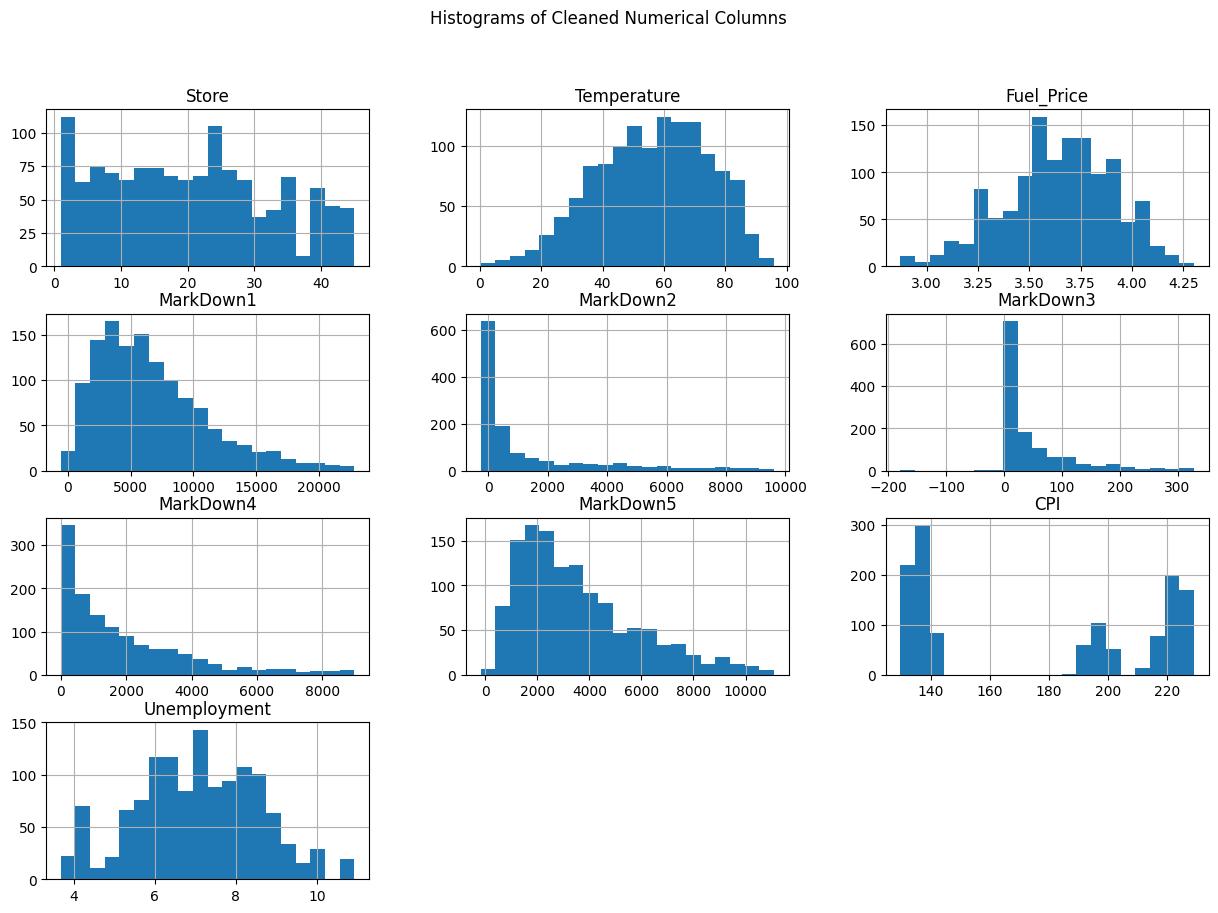

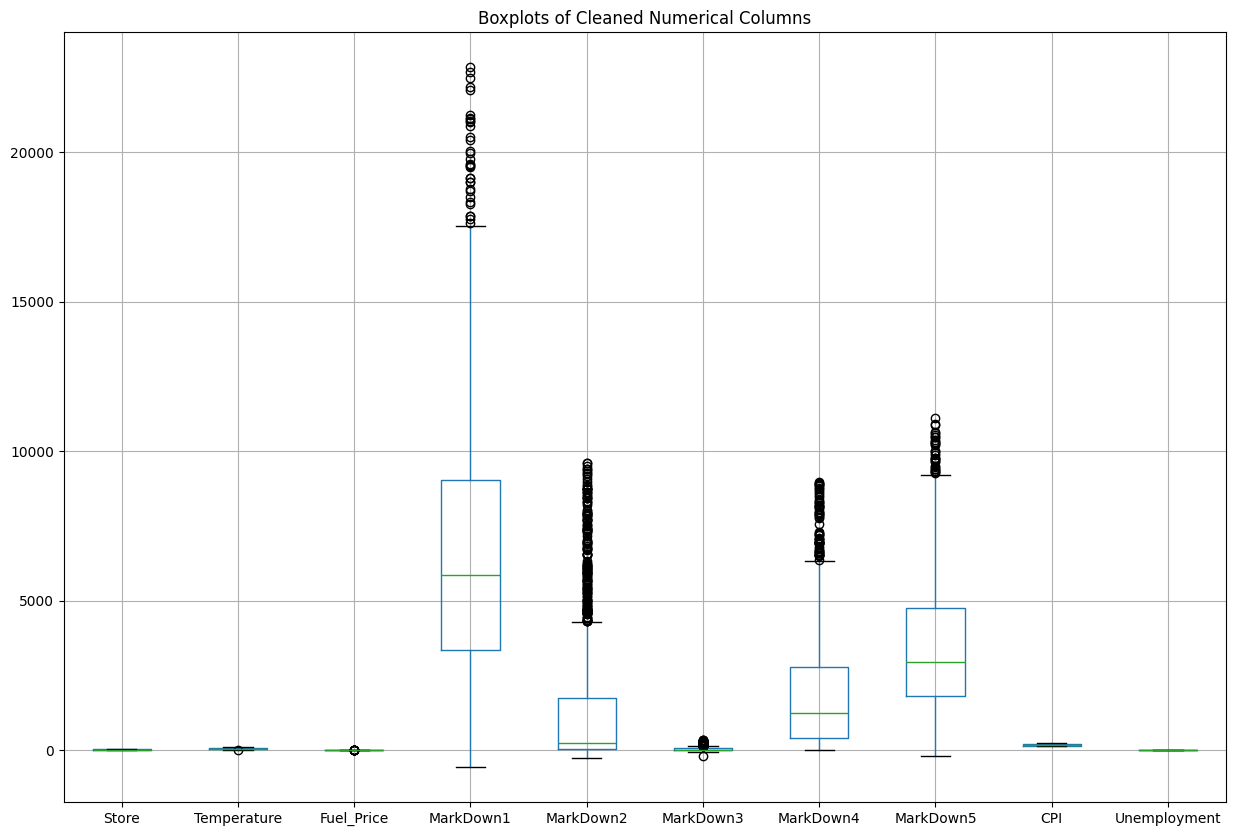

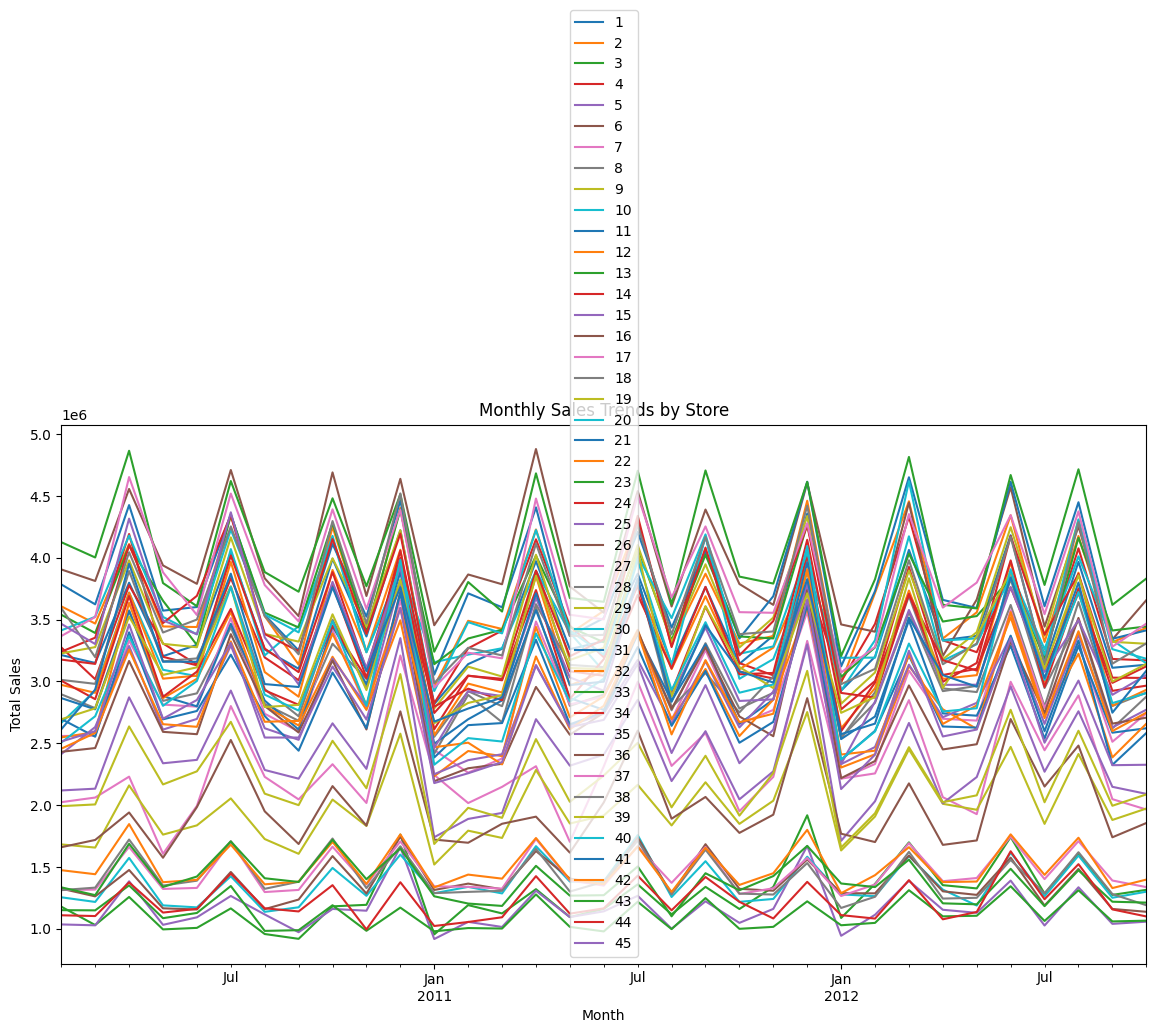

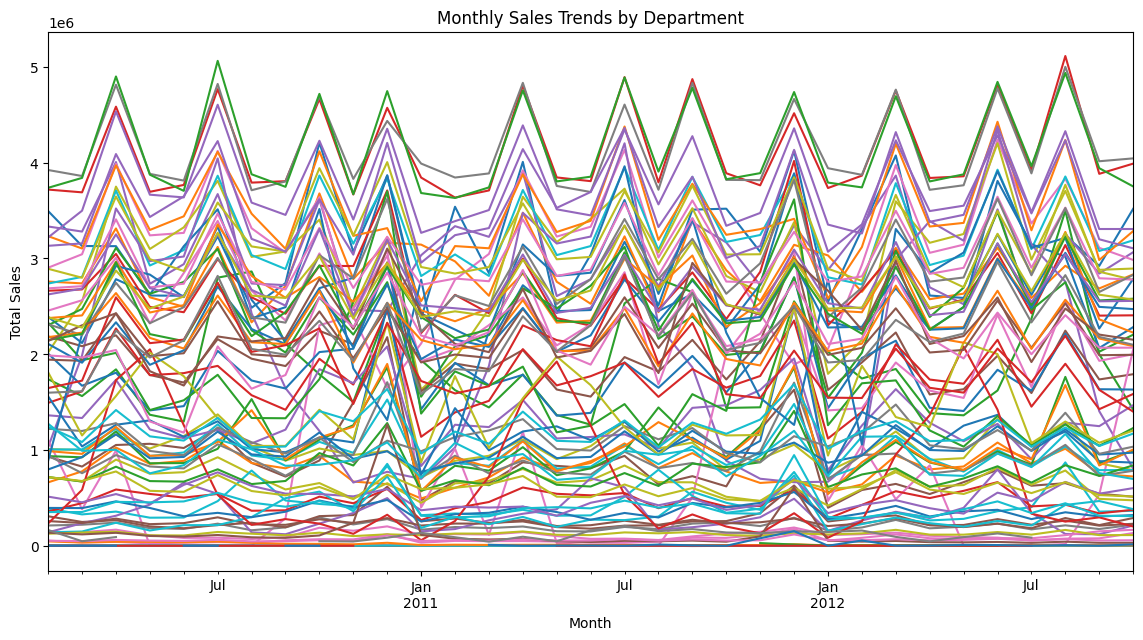

Columns in features_df:
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Data types in features_df:
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object
'IsHoliday' column is present in features_df.
Missing values in 'IsHoliday' before merging:
0
Columns in merged DataFrame:
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_sales', 'Month',
       'IsHoliday'],
      dtype='object')
First few rows of merged DataFrame:
   Store  Dept       Date  Weekly_Sales  IsHoliday_sales    Month  IsHoliday
0      1     1 20

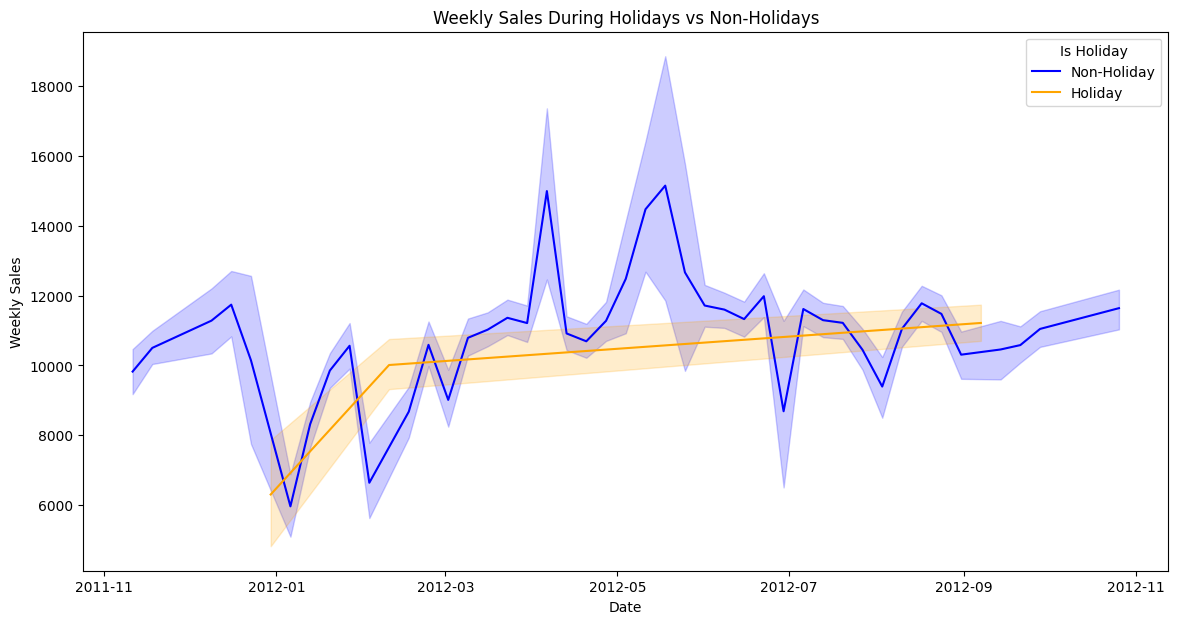

In [9]:
# Visualize cleaned data
numeric_cols = features_df.select_dtypes(include=['float64', 'int64']).columns

# Histograms of cleaned numerical columns
features_df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Cleaned Numerical Columns')
plt.show()

# Boxplots of cleaned numerical columns
plt.figure(figsize=(15, 10))
features_df[numeric_cols].boxplot()
plt.title('Boxplots of Cleaned Numerical Columns')
plt.show()

# Monthly sales trends by store
sales_df['Month'] = sales_df['Date'].dt.to_period('M')  # Converted 'Date' to monthly period
store_monthly_sales = sales_df.groupby(['Store', 'Month'])['Weekly_Sales'].sum().unstack()
store_monthly_sales.T.plot(figsize=(14, 7))
plt.title('Monthly Sales Trends by Store')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='best')
plt.show()

# Monthly sales trends by department
dept_monthly_sales = sales_df.groupby(['Dept', 'Month'])['Weekly_Sales'].sum().unstack()
dept_monthly_sales.T.plot(figsize=(14, 7), legend=False)
plt.title('Monthly Sales Trends by Department')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Check the columns and data types in features_df
print("Columns in features_df:")
print(features_df.columns)
print("Data types in features_df:")
print(features_df.dtypes)

# Ensure 'IsHoliday' is a column in features_df
if 'IsHoliday' not in features_df.columns:
    print("'IsHoliday' column is missing from features_df.")
else:
    print("'IsHoliday' column is present in features_df.")

# Check for missing values in 'IsHoliday' before merging
print("Missing values in 'IsHoliday' before merging:")
print(features_df['IsHoliday'].isnull().sum())

# Merge sales and features datasets on 'Store' and 'Date'
merged_df = pd.merge(sales_df, features_df[['Store', 'Date', 'IsHoliday']], on=['Store', 'Date'])

# Rename columns to avoid confusion
merged_df.rename(columns={'IsHoliday_x': 'IsHoliday_sales', 'IsHoliday_y': 'IsHoliday'}, inplace=True)

# Check if the 'IsHoliday' column is in the merged DataFrame
print("Columns in merged DataFrame:")
print(merged_df.columns)

# Display the first few rows of the merged DataFrame to inspect
print("First few rows of merged DataFrame:")
print(merged_df.head())

# Check for any missing values in 'IsHoliday' after merging
print("Missing values in 'IsHoliday' after merging:")
print(merged_df['IsHoliday'].isnull().sum())

# Weekly Sales During Holidays vs Non-Holidays
plt.figure(figsize=(14, 7))
# Create separate dataframes for holiday and non-holiday
holiday_sales = merged_df[merged_df['IsHoliday'] == True]
non_holiday_sales = merged_df[merged_df['IsHoliday'] == False]

# Plotting
sns.lineplot(data=non_holiday_sales, x='Date', y='Weekly_Sales', label='Non-Holiday', color='blue')
sns.lineplot(data=holiday_sales, x='Date', y='Weekly_Sales', label='Holiday', color='orange')

# Adding the legend
plt.legend(title='Is Holiday')
plt.title('Weekly Sales During Holidays vs Non-Holidays')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Normalize data
scaler = StandardScaler()

numeric_features = features_df.select_dtypes(include=['float64', 'int64']).columns
numeric_sales = sales_df.select_dtypes(include=['float64', 'int64']).columns
numeric_stores = stores_df.select_dtypes(include=['float64', 'int64']).columns

features_df[numeric_features] = scaler.fit_transform(features_df[numeric_features])
sales_df[numeric_sales] = scaler.fit_transform(sales_df[numeric_sales])
stores_df[numeric_stores] = scaler.fit_transform(stores_df[numeric_stores])

## 4. Identify correlated variables

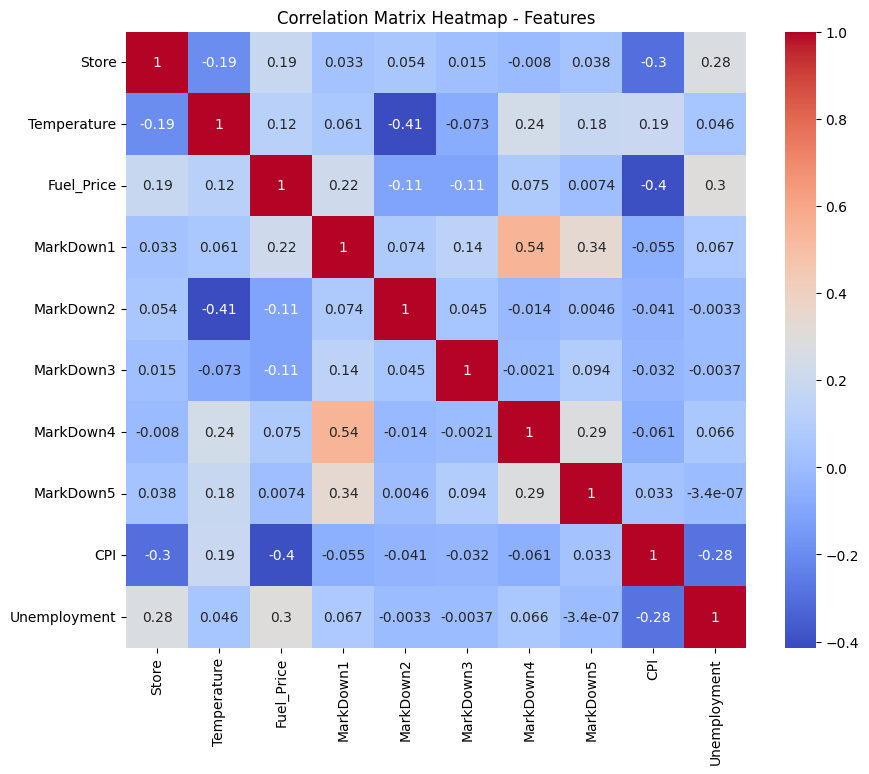

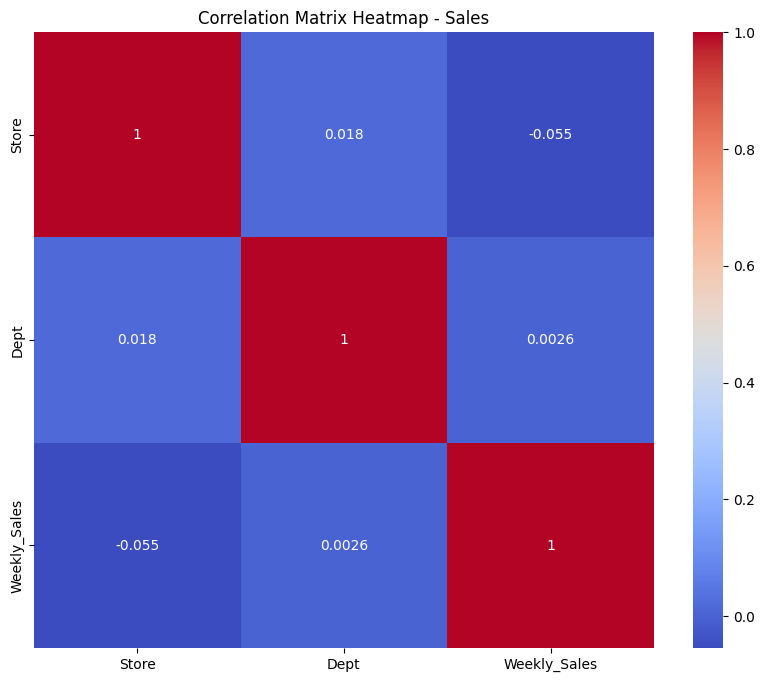

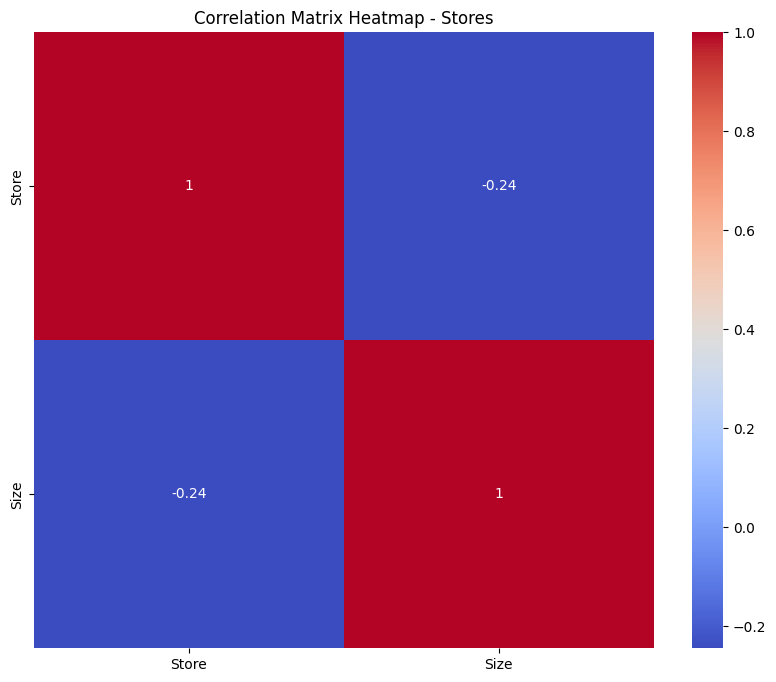

In [10]:
# Correlation matrix for features dataset
numeric_features_df = features_df.select_dtypes(include=['float64', 'int64'])
corr_features = numeric_features_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_features, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - Features')
plt.show()

# Correlation matrix for sales dataset
numeric_sales_df = sales_df.select_dtypes(include=['float64', 'int64'])
corr_sales = numeric_sales_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sales, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - Sales')
plt.show()

# Correlation matrix for stores dataset
numeric_stores_df = stores_df.select_dtypes(include=['float64', 'int64'])
corr_stores = numeric_stores_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_stores, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap - Stores')
plt.show()


## 5. Summary

Summary of EDA and Preprocessing
Steps Taken for EDA and Preprocessing

Data Loading and Initial Exploration:
Loaded features.csv, sales.csv, and stores.csv into pandas DataFrames.
Displayed the first ten rows of each dataset to understand their structure.
Calculated summary statistics for numerical columns, including mean and standard deviation.

Data Visualization:
Plotted histograms for numerical columns to observe distributions.
Created pair plots to explore relationships between variables.
Visualized time-series data to identify trends and seasonal patterns.

Data Cleaning:
Dropped rows with missing values to ensure data integrity.
Removed outliers using the interquartile range (IQR) method to prevent skewing the analysis.
Ensured all columns were in appropriate data types for analysis and modeling.

Feature Engineering:
Extracted month information from the Date column.
Normalized numerical features using StandardScaler to standardize the scales of the data.

Correlation Analysis:
Computed correlation matrices for the features, sales, and stores datasets.
Visualized these matrices using heatmaps to identify significant correlations between variables.

Holiday Impact Analysis:
Merged the sales and features datasets on Store and Date columns.
Analyzed the effect of holidays on weekly sales by plotting line graphs comparing holiday and non-holiday periods.

Key Findings
Seasonal Patterns:
Time-series visualizations revealed distinct seasonal patterns in sales, with peaks during holiday seasons. This indicates a significant increase in sales during certain times of the year, particularly around major holidays.

Holiday Impact on Sales:
The analysis showed that weekly sales are generally higher during holiday periods compared to non-holiday periods. This was visualized through line graphs that clearly differentiated sales trends during these times.

Strong Correlations:
The heatmaps highlighted strong correlations between certain features. For example, store size and location were strongly correlated with weekly sales, suggesting these factors significantly influence sales performance.

Outliers and Data Distribution:
Histograms and box plots identified outliers and provided insights into the data distribution. Removing outliers was crucial to prevent them from disproportionately affecting the analysis and model performance.

Data Normalization:
Standardizing the numerical features ensured that each feature contributed equally during model training. This is particularly important for algorithms sensitive to the scale of input data.

Conclusion
The EDA and preprocessing steps provided a comprehensive understanding of the datasets. By visualizing data, handling missing values, removing outliers, and performing feature engineering, we prepared the datasets for effective machine learning model training. The insights gained, particularly regarding the impact of holidays on sales and identifying strong feature correlations, are valuable for predictive modeling and making data-driven business decisions.

Conclusion
Through thorough EDA and preprocessing, we gained deep insights into the datasets. Visualizing data trends, handling missing values, and feature engineering have set a solid foundation for model training. Key takeaways include the noticeable sales spikes during holidays and the significant correlations between features. These findings are invaluable for building accurate predictive models and guiding data-driven decisions.